<img src="images/usm.jpg" width="480" height="240" align="left"/>

# MAT281 - Laboratorio N°03

## Objetivos del laboratorio

* Reforzar conceptos básicos de análisis no supervisado.

## Contenidos

* [Problema 01](#p1)


<a id='p1'></a>
## I.- Problema 01


<img src="https://freedesignfile.com/upload/2013/06/Car-logos-1.jpg" width="360" height="360" align="center"/>


El conjunto de datos se denomina `vehiculos_procesado_con_grupos.csv`, el cual contine algunas de las características más importante de un vehículo.

En este ejercicio se tiene como objetivo, es poder clasificar los distintos vehículos basados en las cracterísticas que se presentan a continuación. La dificultad de este ejercicio radíca en que ahora tenemos variables numéricas y variables categóricas.

Lo primero será cargar el conjunto de datos:

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.dummy import DummyClassifier
from sklearn.cluster import KMeans


%matplotlib inline
sns.set_palette("deep", desat=.6)
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [2]:
# cargar datos
df = pd.read_csv(os.path.join("data","vehiculos_procesado_con_grupos.csv"), sep=",")\
       .drop(
            ["fabricante", 
             "modelo",
             "transmision", 
             "traccion", 
             "clase", 
             "combustible",
             "consumo"], 
    
          axis=1)

df.head()

,year,desplazamiento,cilindros,co2,clase_tipo,traccion_tipo,transmision_tipo,combustible_tipo,tamano_motor_tipo,consumo_tipo,co2_tipo,consumo_litros_milla
0,1984,2.5,4.0,522.764706,Vehículos Especiales,dos,Automatica,Normal,pequeño,alto,alto,0.222671
1,1984,4.2,6.0,683.615385,Vehículos Especiales,dos,Automatica,Normal,grande,muy alto,muy alto,0.291185
2,1985,2.5,4.0,555.437500,Vehículos Especiales,dos,Automatica,Normal,pequeño,alto,alto,0.236588
3,1985,4.2,6.0,683.615385,Vehículos Especiales,dos,Automatica,Normal,grande,muy alto,muy alto,0.291185
4,1987,3.8,6.0,555.437500,Coches Medianos,dos,Automatica,Premium,grande,alto,alto,0.236588


En este caso, no solo se tienen datos numéricos, sino que también categóricos. Además, tenemos problemas de datos **vacíos (Nan)**. Así que para resolver este problema, seguiremos varios pasos:

## 1.- Normalizar datos

1. Cree un conjunto de datos con las variables numéricas, además, para cada dato vacía, rellene con el promedio asociado a esa columna. Finalmente, normalize los datos mediante el procesamiento **MinMaxScaler** de **sklearn**.

2.-  Cree un conjunto de datos con las variables categóricas , además, transforme de variables numéricas a categóricas ocupando el comando **get_dummies** de pandas ([refrenecia](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html)). Explique a grande rasgo como se realiza la codificación de variables numéricas a categóricas.

3.- Junte ambos dataset en uno, llamado **df_procesado**. 


In [122]:
#1
num_data=[] #lista datos numericos por columna

for column in df.columns[:4]:
    num_data.append(list(df[column])) #se agregan los datos a la lista
    
num_data.append(list(df['consumo_litros_milla']))

l=list(df.columns[:4]) #lista de nombres de las columnas para el nuevo dataframe
l.append('consumo_litros_milla')
df_num = pd.DataFrame( #construccion del df
    {
        l[0]: num_data[0],
        l[1]: num_data[1],
        l[2]: num_data[2],
        l[3]: num_data[3],
        l[4]: num_data[4]
    })

for column in df_num.columns: #reemplaza los valores nulos del dataframe por la media aritmetica por columna
    df_num[column]=df_num[column].fillna(df_num.mean()[column])

In [123]:
from sklearn.preprocessing import MinMaxScaler

#normalizacion mediante MinMaxScaler

scaler = MinMaxScaler()
columns = list(df_num.columns)
df_num[columns] = scaler.fit_transform(df_num[columns])
df_num

,year,desplazamiento,cilindros,co2,consumo_litros_milla
0,0.000000,0.243590,0.142857,0.398014,0.331027
1,0.000000,0.461538,0.285714,0.527672,0.475113
2,0.029412,0.243590,0.142857,0.424351,0.360294
3,0.029412,0.461538,0.285714,0.527672,0.475113
4,0.088235,0.410256,0.285714,0.424351,0.360294
...,...,...,...,...,...
36786,0.911765,0.051282,0.071429,0.173307,0.083878
36787,0.941176,0.038462,0.071429,0.174919,0.090196
36788,0.941176,0.038462,0.071429,0.182174,0.096886
36789,0.970588,0.038462,0.071429,0.176532,0.090196


In [150]:
#2
cat_data=[] #lista datos categoricos por columna

for column in df.columns[4:-1]: #se agregan los datos a la lista
    cat_data.append(list(df[column]))
    
l=list(df.columns[4:-1])#lista de nombres de las columnas para el nuevo dataframe
df_cat = pd.DataFrame( #construccion del df
    {
        l[0]: cat_data[0],
        l[1]: cat_data[1],
        l[2]: cat_data[2],
        l[3]: cat_data[3],
        l[4]: cat_data[4],
        l[5]: cat_data[5],
        l[6]: cat_data[6],
    })
    
df_cat_d=pd.get_dummies(df_cat) #transformacion del df categorico a un df numerico
df_cat_d

,clase_tipo_Camionetas,clase_tipo_Coche Familiar,clase_tipo_Coches Grandes,clase_tipo_Coches Medianos,clase_tipo_Coches pequeños,clase_tipo_Deportivos,clase_tipo_Furgoneta,clase_tipo_Vehículos Especiales,traccion_tipo_cuatro,traccion_tipo_dos,...,consumo_tipo_alto,consumo_tipo_bajo,consumo_tipo_moderado,consumo_tipo_muy alto,consumo_tipo_muy bajo,co2_tipo_alto,co2_tipo_bajo,co2_tipo_moderado,co2_tipo_muy alto,co2_tipo_muy bajo
0,0,0,0,0,0,0,0,1,0,1,...,1,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,1,0,1,...,0,0,0,1,0,0,0,0,1,0
2,0,0,0,0,0,0,0,1,0,1,...,1,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,1,0,1,...,0,0,0,1,0,0,0,0,1,0
4,0,0,0,1,0,0,0,0,0,1,...,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36786,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
36787,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
36788,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
36789,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1


In [126]:
#3
df_procesado=df_num.join(df_cat_d) #se une los df's numerico y categorico(transformado a numerico)

**Comentarios**: Tal como el nombre de la función get_dummies lo dice, la función transforma las variables categóricas en variables de tipo dummy. Esto significa que lleva el dataframe con datos categóricos a datos numéricos, en donde los nombres de las columnas muestran todos los tipos de datos categóricos que podrían tener los valores, y se asigna un 1 en la columna en donde el valor en ese indice es el mismo del nombre de la columna y un 0 si no, obteniendo un dataframe con valores binarios.  

## 2.- Realizar ajuste mediante kmeans

Una vez depurado el conjunto de datos, es momento de aplicar el algoritmo de **kmeans**.

1. Ajuste el modelo de **kmeans** sobre el conjunto de datos, con un total de 8 clusters.
2. Calcular los cluster y el valor de los centroides.
3. Realizar que resumas las principales cualidades de cada cluster. Para  cada cluster calcule:

    a. Valor promedio de las variables numérica.\
    b. Moda para las variables numericas
    
    

In [134]:
from sklearn.cluster import KMeans

#Se ajusta el modelo KMeans a los datos con 8 clusters
kmeans = KMeans(n_clusters=8)
kmeans.fit(df_procesado)

#se obtienen los clusters y los centroides

centroids = kmeans.cluster_centers_ # centros 
clusters = kmeans.labels_ # clusters

In [139]:
df_procesado["cluster"] = clusters #se agrega la columna de clusters al df procesado

In [144]:
grupo = df_procesado.groupby('cluster')
grupo.mean()                   #se agrupan los datos por cluster, y se obtienen los promedios por columna.

,year,desplazamiento,cilindros,co2,consumo_litros_milla,clase_tipo_Camionetas,clase_tipo_Coche Familiar,clase_tipo_Coches Grandes,clase_tipo_Coches Medianos,clase_tipo_Coches pequeños,...,consumo_tipo_alto,consumo_tipo_bajo,consumo_tipo_moderado,consumo_tipo_muy alto,consumo_tipo_muy bajo,co2_tipo_alto,co2_tipo_bajo,co2_tipo_moderado,co2_tipo_muy alto,co2_tipo_muy bajo
cluster,,,,,,,,,,,,,,,,,,,,,
0,0.407741,0.331410,0.256810,0.354289,0.282114,0.181188,0.083993,0.090429,0.133498,0.184653,...,0.000000,0.013861,0.980693,0.000000,0.005446,0.001155,0.000000,0.998845,0.000000,0.000000
1,0.569367,0.169607,0.146057,0.240820,0.156357,0.007990,0.117281,0.017606,0.138407,0.629063,...,0.000000,0.000000,0.000135,0.000000,0.999865,0.000000,0.001219,0.000813,0.000000,0.997969
2,0.452443,0.562730,0.405562,0.501887,0.442585,0.435441,0.001318,0.003953,0.010211,0.058300,...,0.057642,0.000000,0.005599,0.936759,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
3,0.579550,0.269830,0.210005,0.305067,0.226473,0.025947,0.094316,0.072488,0.192545,0.397446,...,0.000618,0.961903,0.000824,0.000000,0.036656,0.000000,0.968493,0.029448,0.000000,0.002059
4,0.588752,0.362292,0.299555,0.354134,0.282258,0.001506,0.083082,0.086596,0.189759,0.558986,...,0.000502,0.026104,0.973394,0.000000,0.000000,0.023594,0.000000,0.976406,0.000000,0.000000
5,0.427318,0.223790,0.173637,0.304599,0.226412,0.126441,0.097434,0.004835,0.088137,0.517665,...,0.000000,0.977687,0.000000,0.000000,0.022313,0.000000,0.992190,0.007810,0.000000,0.000000
6,0.384236,0.585590,0.430797,0.510289,0.454503,0.259250,0.005599,0.059153,0.059396,0.197420,...,0.031159,0.000000,0.011685,0.957157,0.000000,0.001704,0.000000,0.000487,0.997809,0.000000
7,0.476969,0.450984,0.327266,0.410019,0.343261,0.304450,0.017116,0.041506,0.048567,0.151048,...,0.958494,0.000000,0.040650,0.000856,0.000000,0.995721,0.000000,0.000642,0.003637,0.000000


In [145]:
grupo.apply(pd.DataFrame.mode) #se agrupan los datos por cluster, y se obtienen las modas por columna.

,,year,desplazamiento,cilindros,co2,consumo_litros_milla,clase_tipo_Camionetas,clase_tipo_Coche Familiar,clase_tipo_Coches Grandes,clase_tipo_Coches Medianos,clase_tipo_Coches pequeños,...,consumo_tipo_bajo,consumo_tipo_moderado,consumo_tipo_muy alto,consumo_tipo_muy bajo,co2_tipo_alto,co2_tipo_bajo,co2_tipo_moderado,co2_tipo_muy alto,co2_tipo_muy bajo,cluster
cluster,,,,,,,,,,,,,,,,,,,,,,
0,0,0.000000,0.307692,0.285714,0.374603,0.305011,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
1,0,0.970588,0.179487,0.142857,0.275108,0.194444,0,0,0,0,1,...,0,0,0,1,0,0,0,0,1,1
2,0,0.558824,0.653846,0.428571,0.454199,0.393464,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,2
3,0,0.970588,0.179487,0.142857,0.317749,0.241830,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,3
4,0,0.617647,0.307692,0.285714,0.374603,0.281734,0,0,0,0,1,...,0,1,0,0,0,0,1,0,0,4
5,0,0.000000,0.179487,0.142857,0.317749,0.241830,0,0,0,0,1,...,1,0,0,0,0,1,0,0,0,5
6,0,0.000000,0.564103,0.428571,0.454199,0.393464,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,6
7,0,0.029412,0.474359,0.285714,0.424351,0.331027,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,7


## 3.- Elegir Número de cluster

Estime mediante la **regla del codo**, el número de cluster apropiados para el caso.
Para efectos prácticos, eliga la siguiente secuencia como número de clusters a comparar:

$$[5, 10, 20, 30, 50, 75, 100, 200, 300]$$

Una ve realizado el gráfico, saque sus propias conclusiones del caso.


In [148]:
#se obtienen los scores para los distintos numeros de clusters

Nc = [5, 10, 20, 30, 50, 75, 100, 200, 300]
kmeans = [KMeans(n_clusters=i) for i in Nc]
score = [kmeans[i].fit(df_procesado).inertia_ for i in range(len(kmeans))]


df_Elbow = pd.DataFrame({'Number of Clusters':Nc,
                        'Score':score})

df_Elbow

,Number of Clusters,Score
0,5,125412.437521
1,10,83139.715564
2,20,67117.078079
3,30,56978.472804
4,50,45398.928309
5,75,37149.028598
6,100,31092.156820
7,200,18015.375364
8,300,11403.202009


<AxesSubplot:title={'center':'Elbow Curve'}, xlabel='Number of Clusters', ylabel='Score'>

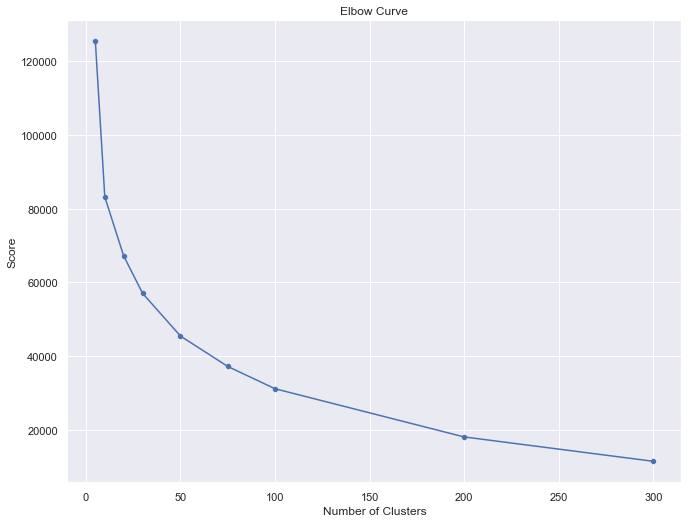

In [149]:
fig, ax = plt.subplots(figsize=(11, 8.5)) #gráfico de los scores con respecto a los clusters
plt.title('Elbow Curve')
sns.lineplot(x="Number of Clusters",
             y="Score",
            data=df_Elbow)
sns.scatterplot(x="Number of Clusters",
             y="Score",
             data=df_Elbow)

**Comentarios**: A partir del gráfico se observa que no existe un punto muy claro en donde haya un quiebre crítico en la forma de la curva, si no que la pendiente crece poco a poco en cada punto, sin embargo, aproximadamente en los 10 clusters el gráfico empieza a cambiar y a aumentar la pendiente de forma un poco más brusca hasta a llegar a los 50 clusters en donde se puede estimar que es donde "termina el codo" de la curva, y ya no hay cambios tan bruscos, por lo que se dirá que entre 10 y 50 clusters pueden ser óptimos para este conjunto de datos. 